# The purpose is to show the jacobi

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[3])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['jc_54.fits',
 'jc_3.fits',
 'jc_15.fits',
 'jc_42.fits',
 'jc_39.fits',
 'jc_127.fits',
 'jc_81.fits',
 'jc_78.fits',
 'jc_97.fits',
 'jc_131.fits',
 'jc_146.fits',
 'jc_58.fits',
 'jc_111.fits',
 'jc_107.fits',
 'jc_19.fits',
 'jc_150.fits',
 'jc_35.fits',
 'jc_62.fits',
 'jc_74.fits',
 'jc_23.fits',
 'jc_22.fits',
 'jc_75.fits',
 'jc_63.fits',
 'jc_34.fits',
 'jc_151.fits',
 'jc_18.fits',
 'jc_106.fits',
 'jc_110.fits',
 'jc_59.fits',
 'jc_147.fits',
 'jc_130.fits',
 'jc_79.fits',
 'jc_96.fits',
 'jc_80.fits',
 'jc_126.fits',
 'jc_38.fits',
 'jc_43.fits',
 'jc_14.fits',
 'jc_2.fits',
 'jc_55.fits',
 'jc_140.fits',
 'jc_9.fits',
 'jc_117.fits',
 'jc_101.fits',
 'jc_156.fits',
 'jc_48.fits',
 'jc_33.fits',
 'jc_64.fits',
 'jc_72.fits',
 'jc_25.fits',
 'jc_52.fits',
 'jc_5.fits',
 'jc_13.fits',
 'jc_44.fits',
 'jc_121.fits',
 'jc_68.fits',
 'jc_87.fits',
 'jc_91.fits',
 'jc_160.fits',
 'jc_29.fits',
 'jc_137.fits',
 'jc_136.fits',
 'jc_28.fits',
 'jc_161.fits',
 'jc_90.fits',
 'jc_69.

In [14]:
fits_files.remove('jspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [17]:
filelist[:5]

['jc_54.fits', 'jc_3.fits', 'jc_15.fits', 'jc_42.fits', 'jc_39.fits']

In [18]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^jc_([0-9].*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append('jc_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [19]:
print obj_names2

['jc_54', 'jc_3', 'jc_15', 'jc_42', 'jc_39', 'jc_127', 'jc_81', 'jc_78', 'jc_97', 'jc_131', 'jc_146', 'jc_58', 'jc_111', 'jc_107', 'jc_19', 'jc_150', 'jc_35', 'jc_62', 'jc_74', 'jc_23', 'jc_22', 'jc_75', 'jc_63', 'jc_34', 'jc_151', 'jc_18', 'jc_106', 'jc_110', 'jc_59', 'jc_147', 'jc_130', 'jc_79', 'jc_96', 'jc_80', 'jc_126', 'jc_38', 'jc_43', 'jc_14', 'jc_2', 'jc_55', 'jc_140', 'jc_9', 'jc_117', 'jc_101', 'jc_156', 'jc_48', 'jc_33', 'jc_64', 'jc_72', 'jc_25', 'jc_52', 'jc_5', 'jc_13', 'jc_44', 'jc_121', 'jc_68', 'jc_87', 'jc_91', 'jc_160', 'jc_29', 'jc_137', 'jc_136', 'jc_28', 'jc_161', 'jc_90', 'jc_69', 'jc_86', 'jc_120', 'jc_45', 'jc_12', 'jc_4', 'jc_53', 'jc_24', 'jc_73', 'jc_65', 'jc_32', 'jc_49', 'jc_157', 'jc_100', 'jc_116', 'jc_141', 'jc_8', 'jc_27', 'jc_139', 'jc_70', 'jc_89', 'jc_66', 'jc_31', 'jc_154', 'jc_103', 'jc_115', 'jc_142', 'jc_135', 'jc_93', 'jc_85', 'jc_123', 'jc_158', 'jc_46', 'jc_11', 'jc_119', 'jc_7', 'jc_50', 'jc_51', 'jc_6', 'jc_118', 'jc_10', 'jc_47', 'jc_159'

In [20]:
obj_names=obj_names2

In [21]:
print obj_files

['jc_54.fits', 'jc_3.fits', 'jc_15.fits', 'jc_42.fits', 'jc_39.fits', 'jc_127.fits', 'jc_81.fits', 'jc_78.fits', 'jc_97.fits', 'jc_131.fits', 'jc_146.fits', 'jc_58.fits', 'jc_111.fits', 'jc_107.fits', 'jc_19.fits', 'jc_150.fits', 'jc_35.fits', 'jc_62.fits', 'jc_74.fits', 'jc_23.fits', 'jc_22.fits', 'jc_75.fits', 'jc_63.fits', 'jc_34.fits', 'jc_151.fits', 'jc_18.fits', 'jc_106.fits', 'jc_110.fits', 'jc_59.fits', 'jc_147.fits', 'jc_130.fits', 'jc_79.fits', 'jc_96.fits', 'jc_80.fits', 'jc_126.fits', 'jc_38.fits', 'jc_43.fits', 'jc_14.fits', 'jc_2.fits', 'jc_55.fits', 'jc_140.fits', 'jc_9.fits', 'jc_117.fits', 'jc_101.fits', 'jc_156.fits', 'jc_48.fits', 'jc_33.fits', 'jc_64.fits', 'jc_72.fits', 'jc_25.fits', 'jc_52.fits', 'jc_5.fits', 'jc_13.fits', 'jc_44.fits', 'jc_121.fits', 'jc_68.fits', 'jc_87.fits', 'jc_91.fits', 'jc_160.fits', 'jc_29.fits', 'jc_137.fits', 'jc_136.fits', 'jc_28.fits', 'jc_161.fits', 'jc_90.fits', 'jc_69.fits', 'jc_86.fits', 'jc_120.fits', 'jc_45.fits', 'jc_12.fits', '

In [22]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [23]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

jc_54 : 
jc_54.fits
jc_3 : 
jc_3.fits
jc_15 : 
jc_15.fits
jc_42 : 
jc_42.fits
jc_39 : 
jc_39.fits
jc_127 : 
jc_127.fits
jc_81 : 
jc_81.fits
jc_78 : 
jc_78.fits
jc_97 : 
jc_97.fits
jc_131 : 
jc_131.fits
jc_146 : 
jc_146.fits
jc_58 : 
jc_58.fits
jc_111 : 
jc_111.fits
jc_107 : 
jc_107.fits
jc_19 : 
jc_19.fits
jc_150 : 
jc_150.fits
jc_35 : 
jc_35.fits
jc_62 : 
jc_62.fits
jc_74 : 
jc_74.fits
jc_23 : 
jc_23.fits
jc_22 : 
jc_22.fits
jc_75 : 
jc_75.fits
jc_63 : 
jc_63.fits
jc_34 : 
jc_34.fits
jc_151 : 
jc_151.fits
jc_18 : 
jc_18.fits
jc_106 : 
jc_106.fits
jc_110 : 
jc_110.fits
jc_59 : 
jc_59.fits
jc_147 : 
jc_147.fits
jc_130 : 
jc_130.fits
jc_79 : 
jc_79.fits
jc_96 : 
jc_96.fits
jc_80 : 
jc_80.fits
jc_126 : 
jc_126.fits
jc_38 : 
jc_38.fits
jc_43 : 
jc_43.fits
jc_14 : 
jc_14.fits
jc_2 : 
jc_2.fits
jc_55 : 
jc_55.fits
jc_140 : 
jc_140.fits
jc_9 : 
jc_9.fits
jc_117 : 
jc_117.fits
jc_101 : 
jc_101.fits
jc_156 : 
jc_156.fits
jc_48 : 
jc_48.fits
jc_33 : 
jc_33.fits
jc_64 : 
jc_64.fits
jc_72 : 
jc_72

## Plot the SED

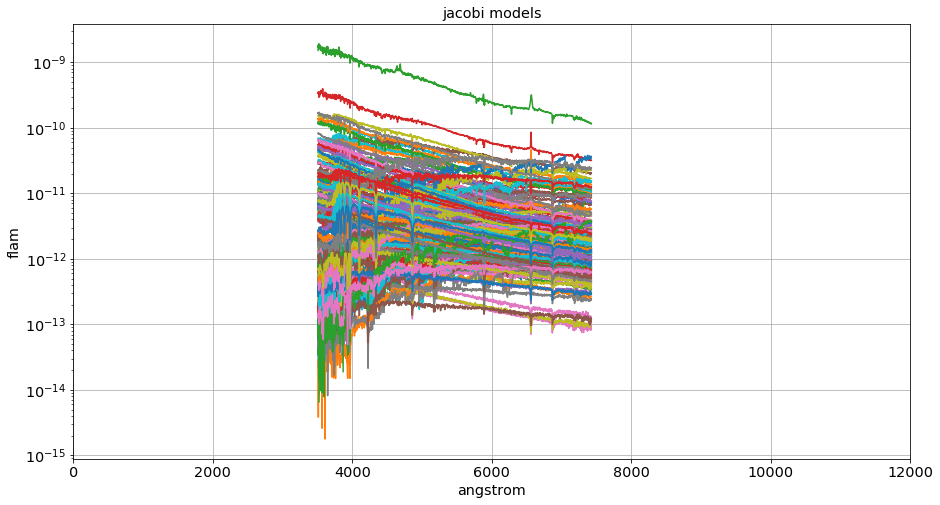

In [24]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("jacobi models")
    plt.savefig("jacobi.png")